# GNNの勉強頑張ろう
グラフニューラルネットワーク（GNN）は、グラフデータの構造を利用して学習を行う深層学習の一種です。

高分子物理の研究においては、分子構造をグラフとして表現し、その特性を予測するためにGNNを使用することができます。

GNNの勉強法には以下のステップを推奨します：

#### 1.基本的な深層学習の理解
 GNNを理解するためには、まず基本的な深層学習の概念（ニューラルネットワーク、バックプロパゲーション、活性化関数など）を理解することが重要です。

#### 2.グラフ理論の理解
GNNはグラフデータに対して動作するため、グラフ理論の基本的な知識が必要です。

#### 3.GNNの理論の理解
GNNの基本的な理論（グラフ畳み込み、グラフ注意、グラフプーリングなど）を学びます。これには、論文や教科書、オンラインのチュートリアルなどが役立ちます。

#### 4.実装の練習
理論を理解したら、実際にGNNを実装してみることが重要です。Pythonの深層学習ライブラリであるPyTorchやTensorFlowは、GNNの実装をサポートする拡張ライブラリ（例えば、PyTorch GeometricやSpektral）を持っています。

#### 5.具体的な問題への適用
最後に、具体的な問題（この場合は高分子物理）にGNNを適用します。これには、適切なデータセットの準備と、そのデータセットに対するGNNの訓練と評価が含まれます。


# グラフを対象とした機械学習タスク

### ノード分類
ノード分類は、グラフが与えられノードが属するクラスが予めわかっている時に，個々のノードがどのクラスに属するかを予測するタスクです。

ex: 友人関係を表す社会ネットワークと，その中の一部の人々に民主党支持者か共産党支持者かのラベルが付いたデータがあるとします．この時，ラベルが付いていない人々のラベルを予測することがノード分類です．

### グラフ分類
グラフ分類は，グラフが与えられノードが属するクラスが予めわかっている時に，グラフ全体がどのクラスに属するかを予測するタスクです．

ex：化学化学物は，原子をノード，結合をエッジとするグラフで表現されます．このグラフデータから，その化学化合物にある毒性や水溶性などの性質を予測します．

### リンク予測
リンク予測は，グラフが与えられノードが属するクラスが予めわかっている時に，ノード間にエッジがあるかどうかを予測するタスクです．

### グラフ生成
グラフ生成は，ノード数やエッジ数が与えられた時に，その条件を満たすグラフを生成するタスクです．


# グラフを対象とした畳み込み
従来の深層学習において，畳み込みニューラルネットワークは比較的単純なグリッドや列を対象としていました．

そのような規則的な構造においては，畳み込みのための近傍フィルターを定義することは比較的容易でした．

グラフにおいても近傍のノード特徴やグラフ分類，リンク予測などのタスクを高精度行うことが期待できます．

しかし，グラフによる畳み込みは以下の理由から単純にはいきません．

#### 隣接頂点数が可変

#### 複雑なトポロジー

#### ノードが順序付けられていない

## GCN
GCN（Graph Convolutional Network）アルゴリズム
#### 入力

・グラフデータ: ノードとエッジから構成されるグラフ

・ノードの特徴量行列: $X \in \mathbb{R}^{N \times D}$（$N$はノード数、$D$は特徴量の次元数）

・隣接行列: $A \in \mathbb{R}^{N \times N}$（隣接行列の要素 $A_{ij}$ はノード $i$ とノード $j$ のエッジの有無を示す）
#### 初期化

・ノード特徴量行列 $H^{(0)}$ を入力特徴量行列 $X$ とする： $H^{(0)} = X$
#### GCNの層を反復計算

・$K$回の反復を行う（通常は数回程度で収束する）


・$k$番目の反復でのノード特徴量行列を $H^{(k)}$ とする

・$H^{(k)}$ から $H^{(k+1)}$ を計算する

　\ ・ノードの隣接ノードの特徴量の集約：

　\ $Z^{(k)} = \hat{A} H^{(k)}$

　　\ \ ・$\hat{A}$ は正規化された隣接行列であり、次のように定義される： $\hat{A} = \tilde{D}^{-\frac{1}{2}} \tilde{A} \tilde{D}^{-\frac{1}{2}}$

　　　\ \ \ ・$\tilde{A} = A + I_N$ は隣接行列に自己ループを追加したもの

　　　\ \ \ ・$\tilde{D}$ は次数行列であり、要素 $\tilde{D}{ii} = \sum{j}\tilde{A}_{ij}$

・線形変換と活性化関数の適用：

　　\ $H^{(k+1)} = \sigma(Z^{(k)} W^{(k)})$

　\ ・$\sigma(\cdot)$ は活性化関数（例：ReLU）

　\ ・$W^{(k)}$ は $k$番目の畳み込み層の重み行列
#### 出力

・GCNの最終出力を $H^{(K)}$ とする

・$H^{(K)}$ を適切なタスクに応じて利用する（例：ノード分類、リンク予測など）

## 簡単なグラフ畳み込みの具体例

In [8]:
# ライブラリのインポート
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import networkx as nx
import matplotlib.pyplot as plt

In [9]:
'''
データセットを作成します。
ここでは、簡単なグラフを作成し、ノードの特徴量と隣接行列を定義します。
'''
# ノードの特徴量
features = torch.tensor([
    [1.0, 2.0],
    [3.0, 4.0],
    [5.0, 6.0]
], dtype=torch.float)

# 隣接行列（完全グラフ）
adjacency_matrix = torch.tensor([
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
], dtype=torch.float)

# NetworkXのグラフオブジェクトを作成
G = nx.from_numpy_matrix(adjacency_matrix.numpy())

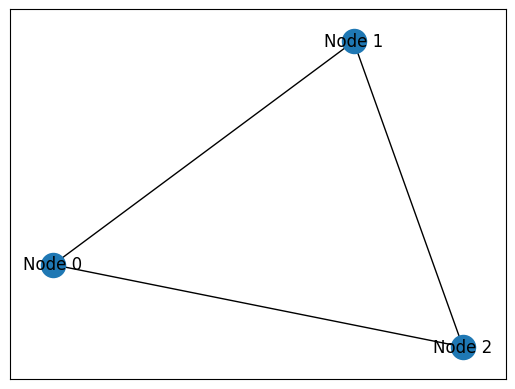

In [10]:
# グラフを可視化
'''
簡単な完全グラフを作りました．
'''
pos = nx.spring_layout(G)  # ノードの配置を決定
labels = {i: f"Node {i}" for i in range(len(features))}
nx.draw_networkx(G, pos=pos, with_labels=True, labels=labels)
plt.show()

In [11]:
# 平均次数
import networkx as nx

# NetworkXのグラフオブジェクトを作成
G = nx.from_numpy_matrix(adjacency_matrix.numpy())

# 各ノードの次数を取得
degrees = G.degree()

# 平均次数を計算
average_degree = sum(dict(degrees).values()) / len(degrees)

print("平均次数:", average_degree)

平均次数: 2.0


In [12]:
# クラスタ係数
import networkx as nx

# NetworkXのグラフオブジェクトを作成
G = nx.from_numpy_matrix(adjacency_matrix.numpy())

# 各ノードのクラスタ係数を取得
cluster_coefficients = nx.clustering(G)

# 平均クラスタ係数を計算
average_cluster_coefficient = sum(cluster_coefficients.values()) / len(cluster_coefficients)

print("平均クラスタ係数:", average_cluster_coefficient)

平均クラスタ係数: 1.0


In [13]:
# 平均距離
import networkx as nx

# NetworkXのグラフオブジェクトを作成
G = nx.from_numpy_matrix(adjacency_matrix.numpy())

# 平均距離を計算
average_distance = nx.average_shortest_path_length(G)

print("平均距離:", average_distance)

平均距離: 1.0


In [14]:
# 中心性
import networkx as nx

# NetworkXのグラフオブジェクトを作成
G = nx.from_numpy_matrix(adjacency_matrix.numpy())

# ノードの次数中心性を計算
degree_centrality = nx.degree_centrality(G)

# ノードの媒介中心性を計算
betweenness_centrality = nx.betweenness_centrality(G)

# ノードの近接中心性を計算
closeness_centrality = nx.closeness_centrality(G)

# 結果を表示
print("次数中心性:", degree_centrality)
print("媒介中心性:", betweenness_centrality)
print("近接中心性:", closeness_centrality)

次数中心性: {0: 1.0, 1: 1.0, 2: 1.0}
媒介中心性: {0: 0.0, 1: 0.0, 2: 0.0}
近接中心性: {0: 1.0, 1: 1.0, 2: 1.0}


In [15]:
'''
単純なGraph Convolutional Network（GCN）を使用します．
GCNは、隣接ノードの情報を集約して、各ノードの表現を更新します．
'''
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, adjacency_matrix, features):
        x = F.relu(self.fc1(torch.matmul(adjacency_matrix, features)))
        x = torch.matmul(adjacency_matrix, x)
        x = self.fc2(x)
        return x

In [16]:
# ネットワークのインスタンスを作成
input_dim = features.size(1)
hidden_dim = 16
output_dim = 2
gcn = GCN(input_dim, hidden_dim, output_dim)

# 損失関数と最適化手法を定義
criterion = nn.MSELoss()
optimizer = optim.Adam(gcn.parameters(), lr=0.01)


In [17]:
# 学習ループの
epochs = 100

for epoch in range(epochs):
    optimizer.zero_grad()
    
    # 順伝播
    outputs = gcn(adjacency_matrix, features)
    
    # 損失計算
    loss = criterion(outputs, features)
    
    # 逆伝播とパラメータ更新
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
        
# 更新後のノードの特徴量を取得
updated_features = outputs
print("Updated Features:")
print(updated_features)

Epoch 10/100, Loss: 2.2000
Epoch 20/100, Loss: 2.6435
Epoch 30/100, Loss: 1.8732
Epoch 40/100, Loss: 1.5459
Epoch 50/100, Loss: 1.5388
Epoch 60/100, Loss: 1.4448
Epoch 70/100, Loss: 1.4359
Epoch 80/100, Loss: 1.4129
Epoch 90/100, Loss: 1.3903
Epoch 100/100, Loss: 1.3696
Updated Features:
tensor([[2.6524, 3.4257],
        [3.1162, 4.1190],
        [3.5800, 4.8123]], grad_fn=<AddmmBackward0>)


更新された特徴量は，GNNが学習過程でグラフデータの情報を処理し，各ノードの特徴量を更新した結果を表しています．

GNNは隣接ノードの情報を利用して各ノードの表現を更新するため，更新後の特徴量はノードの新しい表現を示しています．

具体的には，GNNの学習ループを実行することで，入力として与えられたノードの特徴量を初期値として，ネットワークが隣接ノードの情報を集約し，その結果を用いて各ノードの特徴量を更新します．学習が進むにつれて，隣接ノードからの情報の影響を反映させたより意味のある表現が得られるようになります．

更新された特徴量は，各ノードがグラフの構造と相互作用に基づいて学習された表現を持っていることを意味します．これにより，GNNはグラフデータ上でのさまざまなタスクに対して，より意味のある予測や判断を行うことができるようになります．

# さらなる具体例

## ノード分類の具体例

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.datasets import KarateClub
from torch_geometric.data import DataLoader
from torch_geometric.utils import train_test_split_edges
from torch_geometric.nn import GCNConv
import networkx as nx
import matplotlib.pyplot as plt

Karate Club データセットは，ザカリー・ハリクの論文「An Information Flow Model for Conflict and Fission in Small Groups」で紹介された，34人のカラテクラブのメンバーのソーシャルネットワークを表しています．このデータセットには34のノード（メンバー）があり，ノード間の関係性はエッジ（つながり）で表されます。

このデータセットは，グラフデータのノード分類タスクに使用されることが一般的です．ノード分類タスクでは，各ノードに対して正しいクラスラベルを予測することが目標です．

空手クラブデータセットでは，各メンバーが2つの異なる派閥に属していることが知られており，派閥の情報がクラスラベルとして提供されます．

このデータセットを使用してノード分類モデルをトレーニングすると，モデルは各メンバーを適切な派閥に分類することができるようになります．モデルの性能は，テストセット上での正確さ（分類の精度）によって評価されます．

空手クラブデータセットは，社会ネットワーク分析やグラフ機械学習の研究において，ネットワークの構造とその他の属性情報の組み合わせに基づく予測タスクのベンチマークとして広く使用されています．

In [19]:
dataset = KarateClub()

In [20]:
data = dataset[0]
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [21]:
# データセットの分割
data = train_test_split_edges(data)

/home/taichi/anaconda3/lib/python3.10/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Karate Club データセットにおけるエッジの繋がりは、メンバー間のつながりを表しています。具体的には、エッジ (u, v) が存在する場合、ノード u とノード v はつながっていることを意味します。

このデータセットは、カラテクラブのメンバーのソーシャルネットワークを表しており、エッジはメンバー間の関係性や交流を示しています。ノード同士がエッジでつながっている場合、それらのメンバーは何らかの関係を持っている可能性があります（例えば友人関係、練習パートナー、情報の伝達など）。

可視化したグラフでは、ノードが個別のメンバーを表し、エッジがメンバー間のつながりを示します。つながりの強さや意味はデータセットから直接は分かりませんが、グラフの形状やパターンを観察することで、メンバー間の関係性について洞察を得ることができるかもしれません。

/tmp/ipykernel_164221/3789762104.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.get_cmap('viridis'), edge_color='gray')
/home/taichi/anaconda3/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


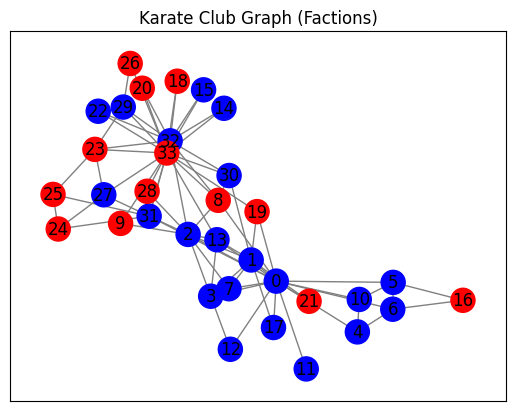

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# データセットの読み込み
dataset = KarateClub()
data = dataset[0]

# グラフの可視化
G = nx.Graph()
G.add_edges_from(data.edge_index.t().tolist())

# ノードの色分け（派閥ごとに色を設定）
node_colors = []
for i in range(data.num_nodes):
    if data.y[i] == 0:
        node_colors.append('r')  # 派閥0は赤色
    else:
        node_colors.append('b')  # 派閥1は青色

# グラフの描画
pos = nx.spring_layout(G, seed=42)  # レイアウトを固定するためにseedを指定
nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.get_cmap('viridis'), edge_color='gray')

plt.title('Karate Club Graph (Factions)')
plt.show()

平均次数

In [23]:
import numpy as np

def calculate_average_degree(data):
    edge_index = data.edge_index.numpy()
    num_nodes = data.num_nodes
    degrees = np.zeros(num_nodes)

    for edge in edge_index.T:
        degrees[edge] += 1

    average_degree = np.mean(degrees)
    return average_degree

average_degree = calculate_average_degree(data)
print(f"Average Degree: {average_degree:.4f}")

Average Degree: 9.1765


最大次数，最小次数

In [24]:
import numpy as np

def calculate_max_min_degree(data):
    edge_index = data.edge_index.numpy()
    num_nodes = data.num_nodes
    degrees = np.zeros(num_nodes)

    for edge in edge_index.T:
        degrees[edge] += 1

    max_degree = np.max(degrees)
    min_degree = np.min(degrees)
    return max_degree, min_degree

max_degree, min_degree = calculate_max_min_degree(data)
print(f"Maximum Degree: {max_degree}")
print(f"Minimum Degree: {min_degree}")

Maximum Degree: 34.0
Minimum Degree: 2.0


クラスタ係数の算出

In [25]:
import networkx as nx

def calculate_clustering_coefficient(data):
    edge_index = data.edge_index.numpy()
    G = nx.Graph()
    G.add_edges_from(edge_index.T)
    clustering_coefficient = nx.average_clustering(G)
    return clustering_coefficient

clustering_coefficient = calculate_clustering_coefficient(data)
print(f"Average Clustering Coefficient: {clustering_coefficient:.4f}")

Average Clustering Coefficient: 0.5706


平均距離の算出

In [26]:
import networkx as nx

def calculate_average_shortest_path_length(data):
    edge_index = data.edge_index.numpy()
    G = nx.Graph()
    G.add_edges_from(edge_index.T)
    average_shortest_path_length = nx.average_shortest_path_length(G)
    return average_shortest_path_length

average_shortest_path_length = calculate_average_shortest_path_length(data)
print(f"Average Shortest Path Length: {average_shortest_path_length:.4f}")

Average Shortest Path Length: 2.4082


中心性

In [27]:
import networkx as nx
import numpy as np

def calculate_degree_centrality(data):
    edge_index = data.edge_index.numpy()
    num_nodes = data.num_nodes
    degrees = np.zeros(num_nodes)

    for edge in edge_index.T:
        degrees[edge] += 1

    degree_centrality = degrees / (num_nodes - 1)
    return degree_centrality

def calculate_closeness_centrality(data):
    edge_index = data.edge_index.numpy()
    num_nodes = data.num_nodes
    G = nx.Graph()
    G.add_edges_from(edge_index.T)
    closeness_centrality = nx.closeness_centrality(G)
    return np.array(list(closeness_centrality.values()))

def calculate_betweenness_centrality(data):
    edge_index = data.edge_index.numpy()
    num_nodes = data.num_nodes
    G = nx.Graph()
    G.add_edges_from(edge_index.T)
    betweenness_centrality = nx.betweenness_centrality(G)
    return np.array(list(betweenness_centrality.values()))

def calculate_eigenvector_centrality(data):
    edge_index = data.edge_index.numpy()
    num_nodes = data.num_nodes
    G = nx.Graph()
    G.add_edges_from(edge_index.T)
    eigenvector_centrality = nx.eigenvector_centrality(G)
    return np.array(list(eigenvector_centrality.values()))

degree_centrality = calculate_degree_centrality(data)
closeness_centrality = calculate_closeness_centrality(data)
betweenness_centrality = calculate_betweenness_centrality(data)
eigenvector_centrality = calculate_eigenvector_centrality(data)

print("Degree Centrality:")
print(degree_centrality)
print("Closeness Centrality:")
print(closeness_centrality)
print("Betweenness Centrality:")
print(betweenness_centrality)
print("Eigenvector Centrality:")
print(eigenvector_centrality)

Degree Centrality:
[0.96969697 0.54545455 0.60606061 0.36363636 0.18181818 0.24242424
 0.24242424 0.24242424 0.3030303  0.12121212 0.18181818 0.06060606
 0.12121212 0.3030303  0.12121212 0.12121212 0.12121212 0.12121212
 0.12121212 0.18181818 0.12121212 0.12121212 0.12121212 0.3030303
 0.18181818 0.18181818 0.12121212 0.24242424 0.18181818 0.24242424
 0.24242424 0.36363636 0.72727273 1.03030303]
Closeness Centrality:
[0.56896552 0.48529412 0.55932203 0.46478873 0.37931034 0.38372093
 0.38372093 0.44       0.515625   0.37931034 0.36666667 0.37078652
 0.515625   0.375      0.5        0.375      0.54098361 0.45833333
 0.43421053 0.45833333 0.45205479 0.515625   0.28448276 0.55
 0.37078652 0.37078652 0.37078652 0.37078652 0.37078652 0.39285714
 0.375      0.38372093 0.375      0.36263736]
Betweenness Centrality:
[0.43763528 0.05393669 0.14365681 0.01190927 0.00063131 0.02998737
 0.02998737 0.         0.05592683 0.00063131 0.         0.
 0.0458634  0.         0.03247505 0.         0.1382756

### GNNの実装


In [28]:
# モデルの定義
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

In [29]:
# モデルの初期化
input_dim = dataset.num_features
hidden_dim = 16
output_dim = dataset.num_classes
model = GCN(input_dim, hidden_dim, output_dim)

In [30]:
# トレーニング関数の定義
def train(model, data, epochs, lr):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# テスト関数の定義
def test(model, data):
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    correct = pred[data.test_mask] == data.y[data.test_mask]
    acc = int(correct.sum()) / int(data.test_mask.sum())
    return acc

In [31]:
# ハイパーパラメータの設定
lr = 0.01
epochs = 100

Epoch 10/100, Loss: 1.1579896211624146
Epoch 20/100, Loss: 0.8920838832855225
Epoch 30/100, Loss: 0.6896349787712097
Epoch 40/100, Loss: 0.4794342815876007
Epoch 50/100, Loss: 0.30342063307762146
Epoch 60/100, Loss: 0.18874891102313995
Epoch 70/100, Loss: 0.12295454740524292
Epoch 80/100, Loss: 0.08549495041370392
Epoch 90/100, Loss: 0.06263937801122665
Epoch 100/100, Loss: 0.04763740301132202


/tmp/ipykernel_164221/2225565865.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.get_cmap('viridis'), edge_color='gray')
/tmp/ipykernel_164221/2225565865.py:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw_networkx(G, pos, with_labels=True, node_color=test_colors, cmap=plt.cm.get_cmap('viridis'), edge_color='gray')
/tmp/ipykernel_164221/2225565865.py:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj

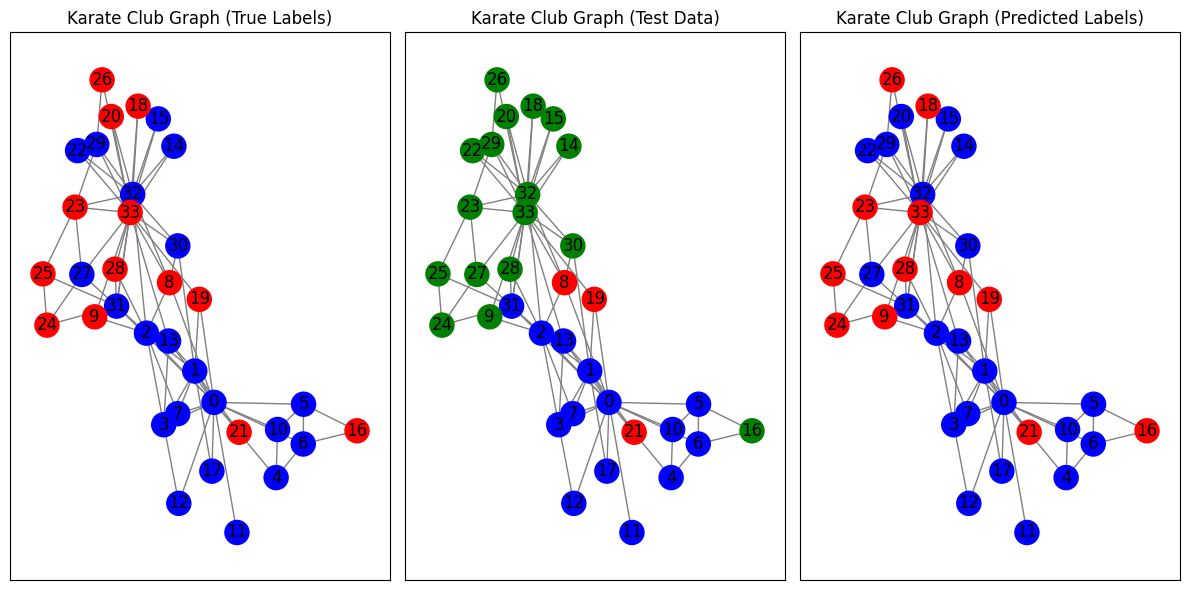

In [32]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import DataLoader

# データセットの読み込み
dataset = KarateClub()
data = dataset[0]

# トレーニングセットとテストセットの分割
num_nodes = data.num_nodes
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[:num_nodes//2] = True  # 例として、前半をトレーニングセットとする
test_mask[num_nodes//2:] = True  # 例として、後半をテストセットとする
data.train_mask = train_mask
data.test_mask = test_mask

# モデルの初期化
model = GCN(input_dim, hidden_dim, output_dim)

# モデルのトレーニング
train(model, data, epochs, lr)

# テストセットでの予測
out = model(data.x, data.edge_index)
pred = out.argmax(dim=1)

# 正解率の計算
correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
accuracy = correct / data.test_mask.sum().item()

# グラフの可視化
G = nx.Graph()
G.add_edges_from(data.edge_index.t().tolist())

# ノードの色分け（派閥ごとに色を設定）
node_colors = []
for i in range(data.num_nodes):
    if data.y[i] == 0:
        node_colors.append('r')  # 派閥0は赤色
    else:
        node_colors.append('b')  # 派閥1は青色

# グラフの描画（派閥ごとの教師ラベル）
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.get_cmap('viridis'), edge_color='gray')
plt.title('Karate Club Graph (True Labels)')

# テストデータの色分け
test_colors = []
for i in range(data.num_nodes):
    if data.test_mask[i]:
        test_colors.append('g')  # テストデータは緑色
    else:
        test_colors.append(node_colors[i])

# グラフの描画（テストデータの色分け）
plt.subplot(1, 3, 2)
nx.draw_networkx(G, pos, with_labels=True, node_color=test_colors, cmap=plt.cm.get_cmap('viridis'), edge_color='gray')
plt.title('Karate Club Graph (Test Data)')

# ノードの色分け（予測ラベルごとに色を設定）
pred_colors = []
for i in range(data.num_nodes):
    if pred[i] == 0:
        pred_colors.append('r')  # 派閥0と予測されたノードは赤色
    else:
        pred_colors.append('b')  # 派閥1と予測されたノードは青色

# グラフの描画（予測結果の色分け）
plt.subplot(1, 3, 3)
nx.draw_networkx(G, pos, with_labels=True, node_color=pred_colors, cmap=plt.cm.get_cmap('viridis'), edge_color='gray')
plt.title('Karate Club Graph (Predicted Labels)')

plt.tight_layout()
plt.show()

## グラフ分類

QM9:https://future-chem.com/qm-dataset/

QM9データセットは，量子力学的な計算や機械学習モデルのトレーニングに使用されるために収集された分子のデータセットです．以下にデータセットの詳細を説明します．

データセットの内容:

分子の構造: 分子を表す原子の座標と結合情報が含まれています．
物理的・化学的特性: 各分子に関連するさまざまな特性が提供されます．

分子の特性:

エネルギーバンドギャップ: 分子の最高占有エネルギーレベルと最低未占有エネルギーレベルの間のエネルギー差を表します．エネルギーバンドギャップは半導体や絶縁体の特性と関連しています．

エネルギー: 分子の全体的なエネルギーを表します．

吸光度: 分子の吸光スペクトルに関連する特性を表します．

HOMOとLUMO: 分子の最高占有軌道（HOMO）と最低未占有軌道（LUMO）のエネルギーレベルを表します．

エンタルピー: 分子のエンタルピー（熱力学的な特性）を表します．

ギブズエネルギー: 分子のギブズエネルギー（熱力学的な特性）を表します．

具体的な分子の特性は、データセット内の各サンプルに含まれています．

データセットのサイズ:

QM9データセットは133,885の分子を含んでいます．
各分子は上記で説明した特性と分子の構造情報を持っています．

QM9データセットは機械学習やディープラーニングモデルのトレーニングやグラフ分類の研究に広く使用されています．分子の性質や相互作用を理解するための重要なリソースとなっています．